In [ ]:
pip install deep-xf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 13.3 MB/s 
     |████████████████████████████████| 356 kB 47.8 MB/s 
     |████████████████████████████████| 1.6 MB 41.3 MB/s 
     |████████████████████████████████| 120 kB 44.6 MB/s 
     |████████████████████████████████| 554 kB 55.4 MB/s 
     |████████████████████████████████| 82 kB 793 kB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491693 sha256=655d8b46497f8f5826196ca0f60a5c4554a73f4acdda516d34c04b57ac13dedc
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43818 sha256=39315512ba56fe6d5c45d95e3e98990dc78129de9815cf7c6b6f947e34a10083
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  A

In [ ]:
# import libraries
from deep_xf.main import *
from deep_xf.dpp import *
from deep_xf.forecast_ml_extension import *
from deep_xf.utility import *

Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

In [ ]:
df = pd.read_csv("1018566_19.csv")
df.head(5)

Unnamed: 0           time  ta_id     blockID  blockDur  t_trp  b_trp  \
0       83565  2018/01/01 05   19.0  63584433.0     180.0  0.991  1.283   
1       83566  2018/01/01 05   19.0  60701205.0     180.0  0.817  0.793   
2       83567  2018/01/01 05   19.0  60701203.0     180.0  1.098  1.493   
3       83568  2018/01/01 06   19.0  60701161.0     195.0  0.468  0.584   
4       83569  2018/01/01 06   19.0  60701162.0     210.0  0.382  0.457   

             real_time  
0  2018-01-01 05:10:00  
1  2018-01-01 05:35:00  
2  2018-01-01 05:50:00  
3  2018-01-01 06:35:00  
4  2018-01-01 06:50:00

In [ ]:
# Мы берем среднее значение столбцов для каждого часа, потому что некоторые значения времени отсутствуют
df_new = df.groupby('time')['t_trp',"b_trp", "blockDur", "ta_id"].agg('mean').reset_index()
df_new.head(5)

time     t_trp     b_trp  blockDur  ta_id
0  2018/01/01 05  0.968667  1.189667     180.0   19.0
1  2018/01/01 06  0.425000  0.520500     202.5   19.0
2  2018/01/01 07  0.655000  0.835500     202.5   19.0
3  2018/01/01 08  0.909500  1.209000     202.5   19.0
4  2018/01/01 09  1.420500  1.473500     202.5   19.0

In [ ]:
df_new1 = df_new.drop(columns = ["time"])

In [ ]:
# Применяем MinMaxscaler к нашим данным
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
df_new1 = st.fit_transform(df_new1) 
df_new1 = pd.DataFrame(df_new1)
df_new1

0         1         2    3
0      0.246856  0.232027  0.748954  0.0
1      0.106862  0.101241  0.843096  0.0
2      0.166087  0.162807  0.843096  0.0
3      0.231621  0.235806  0.843096  0.0
4      0.363203  0.287501  0.843096  0.0
...         ...       ...       ...  ...
32858  0.447191  0.431512  0.567643  0.0
32859  0.391400  0.387928  0.581590  0.0
32860  0.341058  0.354539  0.341004  0.0
32861  0.086134  0.063813  0.759414  0.0
32862  0.108021  0.081403  0.843096  0.0

[32863 rows x 4 columns]

In [ ]:
df_new1 = pd.DataFrame(df_new1)
df_new1["t_trp"] = df_new1[0]
df_new1["b_trp"] = df_new1[1]
df_new1["blockDur"] = df_new1[2]
df_new1["ta_id"] = df_new1[3]
df_new_ = df_new1.drop(columns=[0, 1, 2, 3], axis=1)
df_new_["time"] = df_new["time"]
df_new_.head(3)

t_trp     b_trp  blockDur  ta_id           time
0  0.246856  0.232027  0.748954    0.0  2018/01/01 05
1  0.106862  0.101241  0.843096    0.0  2018/01/01 06
2  0.166087  0.162807  0.843096    0.0  2018/01/01 07

In [ ]:
df_new_ = df_new_.drop(columns=["ta_id"], axis=1)
df_new_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32863 entries, 0 to 32862
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t_trp     32863 non-null  float64
 1   b_trp     32863 non-null  float64
 2   blockDur  32863 non-null  float64
 3   time      32863 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
df_new1 = df_new_.copy()

In [ ]:
# Проверяем есть ли пропущенные значения с помощью метода "missing"
print("Missing information for whole dataset")
print("Missing by row", df_new_.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df_new_.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row t_trp       0
b_trp       0
blockDur    0
time        0
dtype: int64
Missing by col 0        0
1        0
2        0
3        0
4        0
        ..
32858    0
32859    0
32860    0
32861    0
32862    0
Length: 32863, dtype: int64


In [ ]:
# Задаем переменные с помощью меода set_variable, где ts - временное значение, fc - значение, которое хотим предсказать
ts, fc = Forecast.set_variable(ts='time', fc='t_trp')

ts = time
fc = t_trp


In [ ]:
# Присваиваем переменные с помощью метода get_variable. Столбец ts приводится к типу данных datetime, столбцу fc - присваивается значение value
model_df, orig_df = Helper.get_variable(df_new_, ts, fc)

In [ ]:
# Рассмострим случай без дополнительных признаков
model_df_ = model_df.drop(columns = ["b_trp",	"blockDur"], axis=1)
model_df_.head(2)

value
time                         
2018-01-01 05:00:00  0.246856
2018-01-01 06:00:00  0.106862

In [ ]:
# Рассмотрим случай с дополнительными признаками 
model_df.head(3)

value     b_trp  blockDur
time                                             
2018-01-01 05:00:00  0.246856  0.232027  0.748954
2018-01-01 06:00:00  0.106862  0.101241  0.843096
2018-01-01 07:00:00  0.166087  0.162807  0.843096

In [ ]:
# Сохраняется оригинальный датасет
orig_df.head(3)

t_trp     b_trp  blockDur           time
0  0.246856  0.232027  0.748954  2018/01/01 05
1  0.106862  0.101241  0.843096  2018/01/01 06
2  0.166087  0.162807  0.843096  2018/01/01 07

In [ ]:
# Строим график временного ряда за все время с помощью ExploratoryDataAnalysis
plot_ = ExploratoryDataAnalysis.plot_dataset(df=model_df_,fc=fc, title=' ')

In [ ]:
# Добавляем новые временные признаки с помощью метода generate_date_time_features_hour / для случая с доп. признаками
df_full_features_ = Features.generate_date_time_features_hour(model_df, ['hour','month','day','day_of_week','week_of_year'])

In [ ]:
# # Добавляем новые временные признаки с помощью метода generate_date_time_features_hour / для случая без доп. признаков
df_full_features = Features.generate_date_time_features_hour(model_df_, ['hour','month','day','day_of_week','week_of_year'])


In [ ]:
df_full_features.head(3)

value  hour  day  month  day_of_week  week_of_year
time                                                                      
2018-01-01 05:00:00  0.246856     5    1      1            0             1
2018-01-01 06:00:00  0.106862     6    1      1            0             1
2018-01-01 07:00:00  0.166087     7    1      1            0             1

In [ ]:
df_full_features_.head(3)

value     b_trp  blockDur  hour  day  month  \
time                                                                  
2018-01-01 05:00:00  0.246856  0.232027  0.748954     5    1      1   
2018-01-01 06:00:00  0.106862  0.101241  0.843096     6    1      1   
2018-01-01 07:00:00  0.166087  0.162807  0.843096     7    1      1   

                     day_of_week  week_of_year  
time                                            
2018-01-01 05:00:00            0             1  
2018-01-01 06:00:00            0             1  
2018-01-01 07:00:00            0             1

In [ ]:
# Генерируем соответствующие цикличные признаки с использованием метода generate_cyclic_features / без доп. признаков
df_full_features = Features.generate_cyclic_features(df_full_features, 'hour', 24, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'day_of_week', 7, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'month', 12, 1)
df_full_features = Features.generate_cyclic_features(df_full_features, 'week_of_year', 52, 0)


In [ ]:
# Генерируем соответствующие цикличные признаки с использованием метода generate_cyclic_features/ с доп. признаками
df_full_features_ = Features.generate_cyclic_features(df_full_features_, 'hour', 24, 0)
df_full_features_ = Features.generate_cyclic_features(df_full_features_, 'day_of_week', 7, 0)
df_full_features_ = Features.generate_cyclic_features(df_full_features_, 'month', 12, 1)
df_full_features_ = Features.generate_cyclic_features(df_full_features_, 'week_of_year', 52, 0)

In [ ]:
df_full_features = Features.generate_other_related_features(df=df_full_features)
df_full_features_ = Features.generate_other_related_features(df=df_full_features_)

In [ ]:
df_full_features.tail(3)

value  day  sin_hour  cos_hour  sin_day_of_week  \
time                                                                      
2022-06-05 23:00:00  0.341058    5 -0.258819  0.965926        -0.781831   
2022-06-06 00:00:00  0.086134    6  0.000000  1.000000         0.000000   
2022-06-06 01:00:00  0.108021    6  0.258819  0.965926         0.000000   

                     cos_day_of_week  sin_month  cos_month  sin_week_of_year  \
time                                                                           
2022-06-05 23:00:00          0.62349        0.5  -0.866025          0.464723   
2022-06-06 00:00:00          1.00000        0.5  -0.866025          0.354605   
2022-06-06 01:00:00          1.00000        0.5  -0.866025          0.354605   

                     cos_week_of_year  is_holiday  
time                                               
2022-06-05 23:00:00         -0.885456           0  
2022-06-06 00:00:00         -0.935016           0  
2022-06-06 01:00:00         -0.935016           0

Подбор гиперпараметров
(без учета дополнителных признаков)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 5
batch_size = 150
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(19717, 10), Val-(6573, 10), Test-(6573, 10)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
[1/30] Training loss: 0.0219	 Validation loss: 0.0163
[2/30] Training loss: 0.0107	 Validation loss: 0.0104
[3/30] Training loss: 0.0094	 Validation loss: 0.0078
[4/30] Training loss: 0.0095	 Validation loss: 0.0092
[5/30] Training loss: 0.0092	 Validation loss: 0.0076
[6/30] Training loss: 0.0081	 Validation loss: 0.0148
[7/30] Training loss: 0.0090	 Validation loss: 0.0155
[8/30] Training loss: 0.0081	 Validation loss: 0.0114
[9/30] Training loss: 0.0072	 Validation loss: 0.0093
[10/30] Training loss: 0.0071	 Validation loss: 0.0070
[11/30] Training loss: 0.0072	 Validation loss: 0.0058
[12/30] Training loss: 0.0072	 V

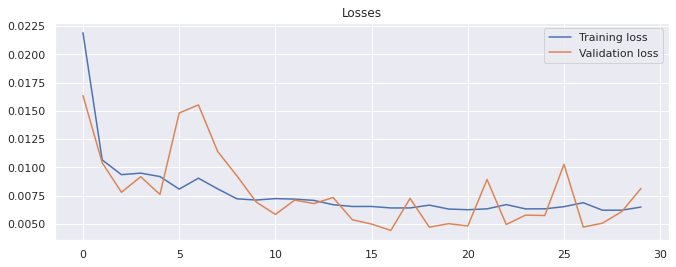

Forecast testset predictions:                         value  prediction
time                                     
2021-07-13 14:00:00  0.214411    0.241848
2021-07-13 15:00:00  0.194412    0.260711
2021-07-13 16:00:00  0.271018    0.287136
2021-07-13 17:00:00  0.350886    0.314768
2021-07-13 18:00:00  0.383589    0.334658
...                       ...         ...
2022-06-05 21:00:00  0.447191    0.340187
2022-06-05 22:00:00  0.391400    0.266167
2022-06-05 23:00:00  0.341058    0.115901
2022-06-06 00:00:00  0.086134    0.063708
2022-06-06 01:00:00  0.108021    0.063437

[6573 rows x 2 columns]
Mean Absolute Error (MAE):        0.06308276
Root Mean Squared Error (RMSE):    0.08860325658006282
Forecast bias:   		   0.04261474980804522
Mean Absolute Percentage Error (MAPE):    25.762894
R^2 Score:                  0.5278336487285258
Explained Variance Score:   0.6370570063591003
Root Mean Squared Relative Error (RMSRE):  0.38517871
Symmetric Mean Absolute Percentage Error (sMAPE):    0.28

Forecast period dataframe: DatetimeIndex(['2022-06-06 02:00:00', '2022-06-06 03:00:00',
               '2022-06-06 04:00:00', '2022-06-06 05:00:00',
               '2022-06-06 06:00:00', '2022-06-06 07:00:00',
               '2022-06-06 08:00:00', '2022-06-06 09:00:00',
               '2022-06-06 10:00:00', '2022-06-06 11:00:00',
               '2022-06-06 12:00:00', '2022-06-06 13:00:00',
               '2022-06-06 14:00:00', '2022-06-06 15:00:00',
               '2022-06-06 16:00:00', '2022-06-06 17:00:00',
               '2022-06-06 18:00:00', '2022-06-06 19:00:00',
               '2022-06-06 20:00:00', '2022-06-06 21:00:00',
               '2022-06-06 22:00:00', '2022-06-06 23:00:00',
               '2022-06-07 00:00:00', '2022-06-07 01:00:00',
               '2022-06-07 02:00:00', '2022-06-07 03:00:00',
               '2022-06-07 04:00:00', '2022-06-07 05:00:00',
               '2022-06-07 06:00:00', '2022-06-07 07:00:00',
               '2022-06-07 08:00:00', '2022-06-07 09:00:00

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 5
batch_size = 170
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(19717, 10), Val-(6573, 10), Test-(6573, 10)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
[1/30] Training loss: 0.0217	 Validation loss: 0.0169
[2/30] Training loss: 0.0109	 Validation loss: 0.0076
[3/30] Training loss: 0.0100	 Validation loss: 0.0124
[4/30] Training loss: 0.0103	 Validation loss: 0.0354
[5/30] Training loss: 0.0104	 Validation loss: 0.0095
[6/30] Training loss: 0.0093	 Validation loss: 0.0282
[7/30] Training loss: 0.0112	 Validation loss: 0.0177
[8/30] Training loss: 0.0095	 Validation loss: 0.0123
[9/30] Training loss: 0.0083	 Validation loss: 0.0067
[10/30] Training loss: 0.0079	 Validation loss: 0.0379
[11/30] Training loss: 0.0091	 Validation loss: 0.0194
[12/30] Training loss: 0.0085	 V

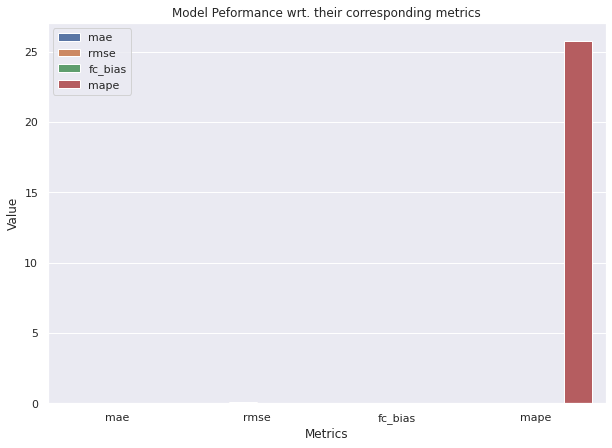

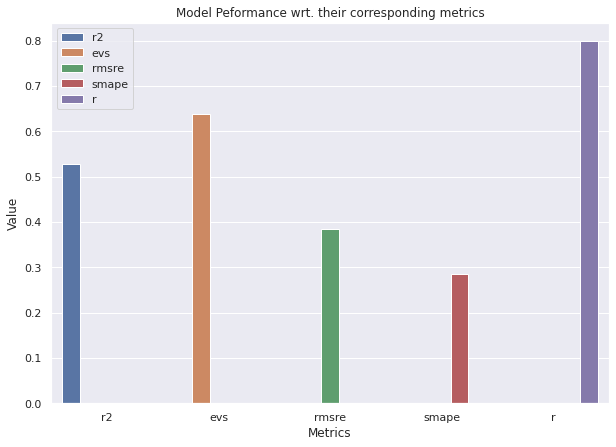

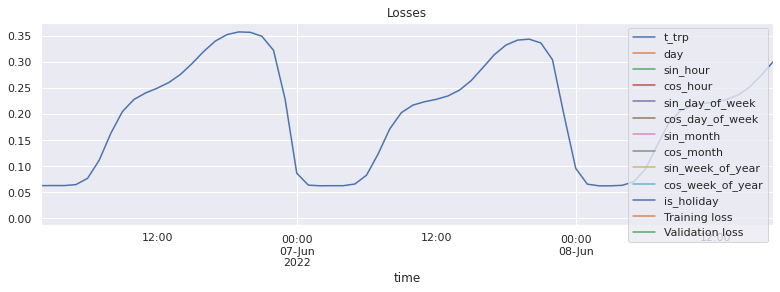

Forecast testset predictions:                         value  prediction
time                                     
2021-07-13 14:00:00  0.214411    0.255124
2021-07-13 15:00:00  0.194412    0.270631
2021-07-13 16:00:00  0.271018    0.292224
2021-07-13 17:00:00  0.350886    0.318242
2021-07-13 18:00:00  0.383589    0.343505
...                       ...         ...
2022-06-05 21:00:00  0.447191    0.379857
2022-06-05 22:00:00  0.391400    0.352158
2022-06-05 23:00:00  0.341058    0.271960
2022-06-06 00:00:00  0.086134    0.131791
2022-06-06 01:00:00  0.108021    0.092607

[6573 rows x 2 columns]
Mean Absolute Error (MAE):        0.056284525
Root Mean Squared Error (RMSE):    0.07335704063422699
Forecast bias:   		   -0.009732377414886181
Mean Absolute Percentage Error (MAPE):    35.03127
R^2 Score:                  0.6763472918990926
Explained Variance Score:   0.6820441484451294
Root Mean Squared Relative Error (RMSRE):  0.8131529
Symmetric Mean Absolute Percentage Error (sMAPE):    0.2

Forecast period dataframe: DatetimeIndex(['2022-06-06 02:00:00', '2022-06-06 03:00:00',
               '2022-06-06 04:00:00', '2022-06-06 05:00:00',
               '2022-06-06 06:00:00', '2022-06-06 07:00:00',
               '2022-06-06 08:00:00', '2022-06-06 09:00:00',
               '2022-06-06 10:00:00', '2022-06-06 11:00:00',
               '2022-06-06 12:00:00', '2022-06-06 13:00:00',
               '2022-06-06 14:00:00', '2022-06-06 15:00:00',
               '2022-06-06 16:00:00', '2022-06-06 17:00:00',
               '2022-06-06 18:00:00', '2022-06-06 19:00:00',
               '2022-06-06 20:00:00', '2022-06-06 21:00:00',
               '2022-06-06 22:00:00', '2022-06-06 23:00:00',
               '2022-06-07 00:00:00', '2022-06-07 01:00:00',
               '2022-06-07 02:00:00', '2022-06-07 03:00:00',
               '2022-06-07 04:00:00', '2022-06-07 05:00:00',
               '2022-06-07 06:00:00', '2022-06-07 07:00:00',
               '2022-06-07 08:00:00', '2022-06-07 09:00:00

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 5
batch_size = 190
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(19717, 10), Val-(6573, 10), Test-(6573, 10)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
[1/30] Training loss: 0.0232	 Validation loss: 0.0177
[2/30] Training loss: 0.0116	 Validation loss: 0.0088
[3/30] Training loss: 0.0107	 Validation loss: 0.0379
[4/30] Training loss: 0.0126	 Validation loss: 0.0157
[5/30] Training loss: 0.0108	 Validation loss: 0.0182
[6/30] Training loss: 0.0114	 Validation loss: 0.0141
[7/30] Training loss: 0.0101	 Validation loss: 0.0084
[8/30] Training loss: 0.0091	 Validation loss: 0.1157
[9/30] Training loss: 0.0142	 Validation loss: 0.0084
[10/30] Training loss: 0.0085	 Validation loss: 0.0140
[11/30] Training loss: 0.0080	 Validation loss: 0.0058
[12/30] Training loss: 0.0069	 V

In [ ]:
# Подбираем гиперпараметры, а именно размер скрытого слоя hidden_dim_ и размер батча batch_size_ 
best_score = 30000
features = {'hidden_dim':0, 'batch_size':0}
opt = None
scaler = None

for hidden_dim_ in range(200,330,20):
    # for dropout_ in np.arange(0.1, 0.5, 0.1):
         for batch_size_ in range(150,260,20):
              try:
                    
                    select_model,select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='lstm', select_user_path='./PROJECT/', select_scaler='minmax', forecast_window=1)

                    
                    hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
                    Forecast.hyperparameter_config(hidden_dim=hidden_dim_, layer_dim = 5, batch_size=batch_size_, dropout = 0.1, \
                                            n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

                    
                    opt, scaler = Forecast.train(df=df_full_features, target_col='value', split_ratio=0.2, select_model=select_model, \
                    select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size_,\
                    hidden_dim=hidden_dim_, layer_dim=layer_dim,dropout=dropout, \
                    n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)
              
                    
                    forecasted_data, ff_full_features, ff_full_features_ = Forecast.forecast(df_full_features[32800:], ts, fc, opt, scaler, period=64, fq='1h', select_scaler=select_scaler)
            
                    trues = df_full_features["value"][32800:]

                    mse = mean_squared_error(trues, forecasted_data)

                     
                    if mse < best_score:
                             best_score = mse
                             features['hidden_dim'] = hidden_dim_
                            #  features['dropout'] = dropout_
                             features['batch_size'] = batch_size_
              except: continue
print("hidden_dim: {} | batch: {}".format(features['hidden_dim'], features['batch_size']))

In [ ]:
# Настройка конфигураций модели прогнозирования - В настоящее время предоставляемые протестированные глубокие нейронные сети включают['rnn', 'lstm', 'gru']
# Задаем параметры с поомщью set_model_config
select_model,select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='lstm', select_user_path='./PROJECT/', select_scaler='minmax', forecast_window=1)

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1


In [ ]:
# Задаем гиперпараметры с поомощью метода hyperparameter_config
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
Forecast.hyperparameter_config(hidden_dim=220, layer_dim = 5, batch_size=280, dropout = 0.1, \
                               n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

hidden_dim = 220
layer_dim = 5
batch_size = 280
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06


Train-Val-Test Split
Predictors: Train-(19717, 10), Val-(6573, 10), Test-(6573, 10)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
[1/30] Training loss: 0.0212	 Validation loss: 0.0162
[2/30] Training loss: 0.0114	 Validation loss: 0.0310
[3/30] Training loss: 0.0141	 Validation loss: 0.0087
[4/30] Training loss: 0.0101	 Validation loss: 0.0094
[5/30] Training loss: 0.0097	 Validation loss: 0.0063
[6/30] Training loss: 0.0093	 Validation loss: 0.0183
[7/30] Training loss: 0.0101	 Validation loss: 0.0105
[8/30] Training loss: 0.0093	 Validation loss: 0.0073
[9/30] Training loss: 0.0083	 Validation loss: 0.0053
[10/30] Training loss: 0.0077	 Validation loss: 0.0076
[11/30] Training loss: 0.0073	 Validation loss: 0.0056
[12/30] Training loss: 0.0076	 Validation loss: 0.0055
[13/30] Training loss: 0.0079	 Validation loss: 0.0098
[14/30] Training loss: 0.0081	 Validation loss: 0.0057
[15/30] Training loss: 0.0070	 Validation loss: 0.0067
[16/30] Training loss: 0

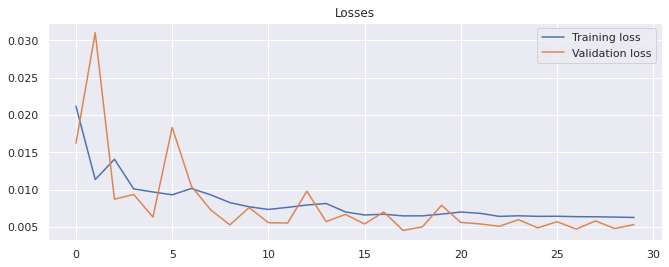

Forecast testset predictions:                         value  prediction
time                                     
2021-07-13 14:00:00  0.214411    0.246837
2021-07-13 15:00:00  0.194412    0.263625
2021-07-13 16:00:00  0.271018    0.287416
2021-07-13 17:00:00  0.350886    0.318680
2021-07-13 18:00:00  0.383589    0.353611
...                       ...         ...
2022-06-05 21:00:00  0.447191    0.407887
2022-06-05 22:00:00  0.391400    0.357385
2022-06-05 23:00:00  0.341058    0.250193
2022-06-06 00:00:00  0.086134    0.119167
2022-06-06 01:00:00  0.108021    0.072803

[6573 rows x 2 columns]
Mean Absolute Error (MAE):        0.058405194
Root Mean Squared Error (RMSE):    0.07493100531835854
Forecast bias:   		   -0.026091373222486877
Mean Absolute Percentage Error (MAPE):    35.619762
R^2 Score:                  0.6623095593194898
Explained Variance Score:   0.7032535076141357
Root Mean Squared Relative Error (RMSRE):  0.78134286
Symmetric Mean Absolute Percentage Error (sMAPE):    0

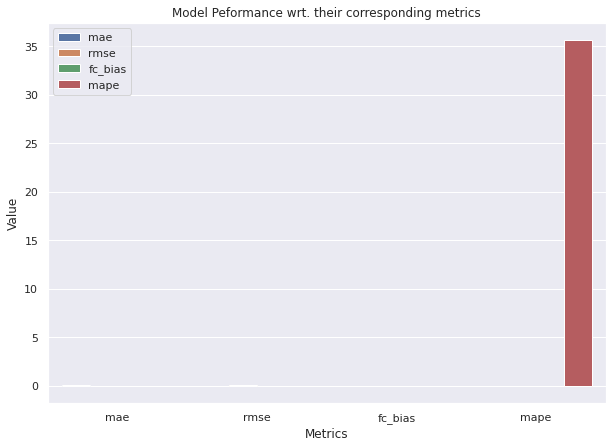

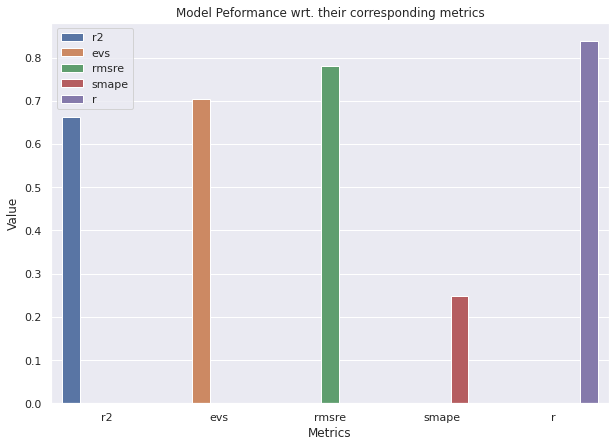

In [ ]:
# Обучаем модель с помощью иетода train / для случая без доп. признаков
opt, scaler = Forecast.train(df=df_full_features, target_col='value', split_ratio=0.2, select_model=select_model, \
             select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size,\
            hidden_dim=hidden_dim, layer_dim=layer_dim,dropout=dropout, \
             n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)

Forecast period dataframe: DatetimeIndex(['2022-06-06 02:00:00', '2022-06-06 03:00:00',
               '2022-06-06 04:00:00', '2022-06-06 05:00:00',
               '2022-06-06 06:00:00', '2022-06-06 07:00:00',
               '2022-06-06 08:00:00', '2022-06-06 09:00:00',
               '2022-06-06 10:00:00', '2022-06-06 11:00:00',
               ...
               '2022-07-04 20:00:00', '2022-07-04 21:00:00',
               '2022-07-04 22:00:00', '2022-07-04 23:00:00',
               '2022-07-05 00:00:00', '2022-07-05 01:00:00',
               '2022-07-05 02:00:00', '2022-07-05 03:00:00',
               '2022-07-05 04:00:00', '2022-07-05 05:00:00'],
              dtype='datetime64[ns]', name='time', length=700, freq=None)
Tensor size: 700
Forecast period predictions:                         value
time                         
2022-06-06 02:00:00  0.073323
2022-06-06 03:00:00  0.065519
2022-06-06 04:00:00  0.067642
2022-06-06 05:00:00  0.082781
2022-06-06 06:00:00  0.129707
...          

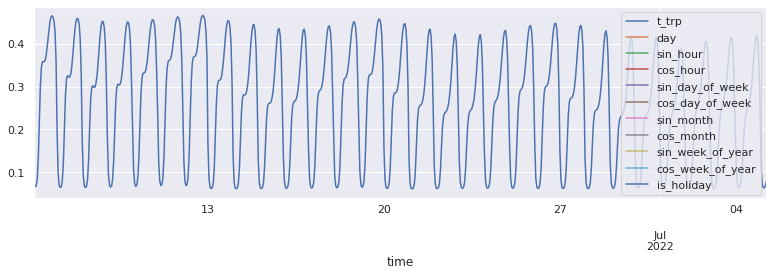

In [ ]:
#  Делаем прогноз на месяц вперед с помощью мметода forecast
 forecasted_data, ff_full_features, ff_full_features_ = Forecast.forecast(df_full_features, ts, fc, opt, scaler, period=700, fq='1h', select_scaler=select_scaler)

In [ ]:
pred = list(forecasted_data['t_trp'])
y=list(model_df_['value'])

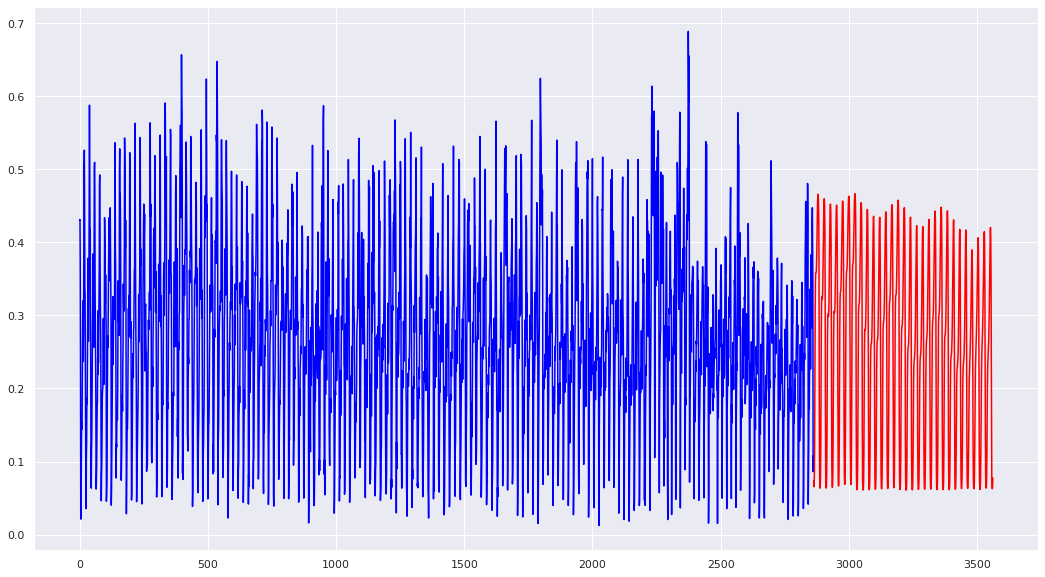

In [ ]:
# Строим график известных значений и предсказанных значений
plt.figure(figsize=(18,10))
plt.plot(y[30000:], color="blue")
plt.plot(list([None for i in range(2863)]) +list(pred[32863:]), color = "red")


Epoch 1/30
1027/1027 [==============================] - 3s 2ms/step - loss: 0.4703
Epoch 2/30
1027/1027 [==============================] - 3s 3ms/step - loss: 0.2602
Epoch 3/30
1027/1027 [==============================] - 5s 5ms/step - loss: 0.2270
Epoch 4/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2206
Epoch 5/30
1027/1027 [==============================] - 3s 3ms/step - loss: 0.2183
Epoch 6/30
1027/1027 [==============================] - 4s 4ms/step - loss: 0.2191
Epoch 7/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2141
Epoch 8/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2145
Epoch 9/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2108
Epoch 10/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2106
Epoch 11/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2094
Epoch 12/30
1027/1027 [==============================] - 2s 2ms/step - loss: 0.2103
E

  0%|          | 0/50 [00:00<?, ?it/s]

97/97 [==============================] - 0s 2ms/step
Current Label Shown: t_trp_0



Current Label Shown: t_trp_0



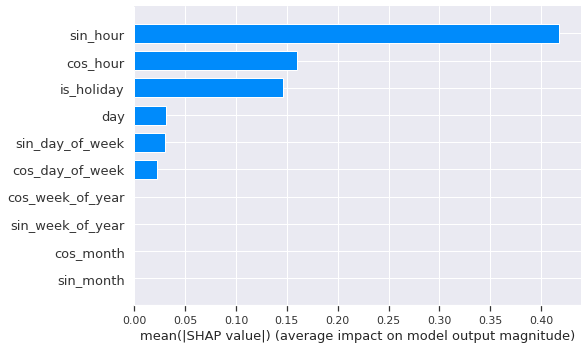

In [ ]:
# С поомщью метода explainable_forecast можем получить вклад в прогноз каждого признака по отдельности
Helper.explainable_forecast(df_full_features, ff_full_features_, fc, specific_prediction_sample_to_explain=df_full_features.shape[0]+2, input_label_index_value=0, num_labels=1)


Обучение с учетом всех признаков


In [ ]:
# Подбираем гиперпараметры, а именно размер скрытого слоя hidden_dim_ и размер батча batch_size_
best_score = 30000
features = {'hidden_dim':0, 'dropout':0, 'batch_size':0}
opt = None
scaler = None

for hidden_dim_ in range(200,330,20):
    # for dropout_ in np.arange(0.1, 0.5, 0.1):
         for batch_size_ in range(150,260,20):
              try:
                    select_model,select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='lstm', select_user_path='./PROJECT/', select_scaler='minmax', forecast_window=1)

                    
                    hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
                    Forecast.hyperparameter_config(hidden_dim=hidden_dim_, layer_dim = 3, batch_size=batch_size_, dropout = 0.1, \
                                            n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

                    
                    opt, scaler = Forecast.train(df=df_full_features_, target_col='value', split_ratio=0.2, select_model=select_model, \
                    select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size_,\
                    hidden_dim=hidden_dim_, layer_dim=layer_dim,dropout=dropout, \
                    n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)
              
                    
                    forecasted_data, ff_full_features, ff_full_features_ = Forecast.forecast(df_full_features[32800:], ts, fc, opt, scaler, period=64, fq='1h', select_scaler=select_scaler)
                    
                    trues = df_full_features["value"][32800:]

                    mse = mean_squared_error(trues, forecasted_data)

                     
                    if mse < best_score:
                             best_score = mse
                             features['hidden_dim'] = hidden_dim_
                            #  features['dropout'] = dropout_
                             features['batch_size'] = batch_size_
              except: continue
print("best_score: {}".format(best_score))             
print("hidden_dim: {} | batch: {}".format(features['hidden_dim'], features['batch_size']))

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 3
batch_size = 150
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(19717, 12), Val-(6573, 12), Test-(6573, 12)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 3
batch_size = 170
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(19717, 12), Val-(6573, 12), Test-(6573, 12)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1
hidden_dim = 200
layer_dim = 3
batch_size = 190
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06
Train-Val-Test Split
Predictors: Train-(1971

In [ ]:
# Настройка конфигураций модели прогнозирования - В настоящее время предоставляемые протестированные глубокие нейронные сети включают['rnn', 'lstm', 'gru']
# Задаем параметры с поомщью set_model_config
select_model,select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='lstm', select_user_path='./PROJECT/', select_scaler='minmax', forecast_window=1)

select_model = lstm
select_user_path = ./PROJECT/
select_scaler = minmax
forecast_window = 1


In [ ]:
# Задаем гиперпараметры с поомощью метода hyperparameter_config
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
Forecast.hyperparameter_config(hidden_dim=60, layer_dim = 3, batch_size=30, dropout = 0.1, \
                               n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

hidden_dim = 60
layer_dim = 3
batch_size = 30
dropout = 0.1
n_epochs = 30
learning_rate = 0.001
weight_decay = 1e-06


In [ ]:
df_full_features_.head(3)

value     b_trp  blockDur  day  sin_hour  \
time                                                               
2018-01-01 05:00:00  0.246856  0.232027  0.748954    1  0.965926   
2018-01-01 06:00:00  0.106862  0.101241  0.843096    1  1.000000   
2018-01-01 07:00:00  0.166087  0.162807  0.843096    1  0.965926   

                         cos_hour  sin_day_of_week  cos_day_of_week  \
time                                                                  
2018-01-01 05:00:00  2.588190e-01              0.0              1.0   
2018-01-01 06:00:00  6.123234e-17              0.0              1.0   
2018-01-01 07:00:00 -2.588190e-01              0.0              1.0   

                     sin_month  cos_month  sin_week_of_year  cos_week_of_year  \
time                                                                            
2018-01-01 05:00:00        0.0        1.0          0.120537          0.992709   
2018-01-01 06:00:00        0.0        1.0          0.120537          0.992709   
2018-01-01 07:00:00        0.0        1.0          0.120537          0.992709   

                     is_holiday  
time                             
2018-01-01 05:00:00           1  
2018-01-01 06:00:00           1  
2018-01-01 07:00:00           1

Train-Val-Test Split
Predictors: Train-(19717, 12), Val-(6573, 12), Test-(6573, 12)
Response: Train-(19717, 1), Val-(6573, 1), Test-(6573, 1)
cpu is available.
[1/30] Training loss: 0.0081	 Validation loss: 0.0031
[2/30] Training loss: 0.0027	 Validation loss: 0.0036
[3/30] Training loss: 0.0024	 Validation loss: 0.0026
[4/30] Training loss: 0.0023	 Validation loss: 0.0025
[5/30] Training loss: 0.0022	 Validation loss: 0.0025
[6/30] Training loss: 0.0021	 Validation loss: 0.0022
[7/30] Training loss: 0.0020	 Validation loss: 0.0019
[8/30] Training loss: 0.0020	 Validation loss: 0.0018
[9/30] Training loss: 0.0020	 Validation loss: 0.0017
[10/30] Training loss: 0.0020	 Validation loss: 0.0017
[11/30] Training loss: 0.0020	 Validation loss: 0.0017
[12/30] Training loss: 0.0019	 Validation loss: 0.0017
[13/30] Training loss: 0.0019	 Validation loss: 0.0017
[14/30] Training loss: 0.0019	 Validation loss: 0.0017
[15/30] Training loss: 0.0019	 Validation loss: 0.0017
[16/30] Training loss: 0

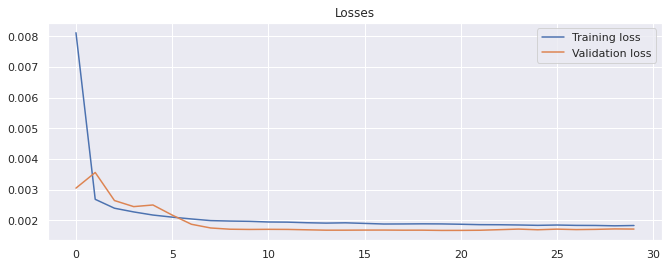

Forecast testset predictions:                         value  prediction
time                                     
2021-07-13 14:00:00  0.214411    0.214926
2021-07-13 15:00:00  0.194412    0.225081
2021-07-13 16:00:00  0.271018    0.284442
2021-07-13 17:00:00  0.350886    0.303376
2021-07-13 18:00:00  0.383589    0.312424
...                       ...         ...
2022-06-05 21:00:00  0.447191    0.449021
2022-06-05 22:00:00  0.391400    0.396548
2022-06-05 23:00:00  0.341058    0.349762
2022-06-06 00:00:00  0.086134    0.078119
2022-06-06 01:00:00  0.108021    0.080531

[6573 rows x 2 columns]
Mean Absolute Error (MAE):        0.032973267
Root Mean Squared Error (RMSE):    0.04545169642833683
Forecast bias:   		   -0.0013333101097024523
Mean Absolute Percentage Error (MAPE):    13.622309
R^2 Score:                  0.8757501471696338
Explained Variance Score:   0.8758570551872253
Root Mean Squared Relative Error (RMSRE):  0.20579913
Symmetric Mean Absolute Percentage Error (sMAPE):    

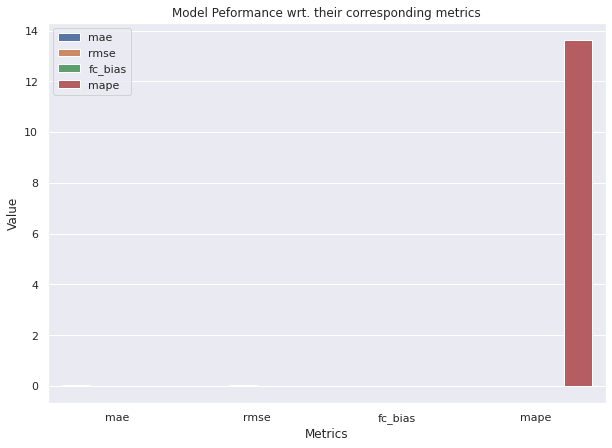

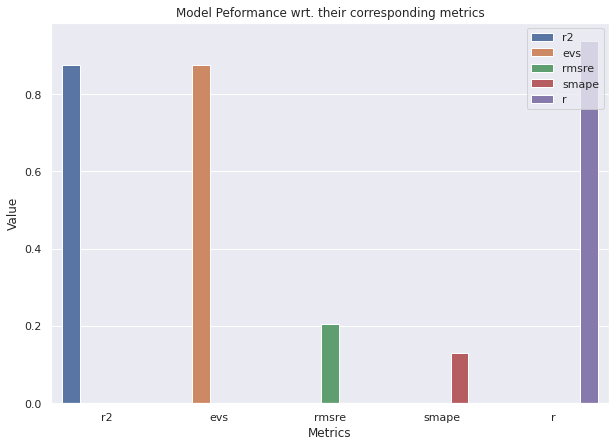

In [ ]:
# Обучаем модель с помощью иетода train / для случая с доп. признаками
opt, scaler = Forecast.train(df=df_full_features_, target_col='value', split_ratio=0.2, select_model=select_model, \
             select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size,\
            hidden_dim=hidden_dim, layer_dim=layer_dim,dropout=dropout, \
             n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)

Видно, что результат прогноза имеющихся данных лучше для случая с учетом дополнительных признаков, однако прогноз на месяц вперед выполнить не удалось

In [ ]:
forecasted_data1, ff_full_features1, ff_full_features_1 = Forecast.forecast(df_full_features_, ts, fc, opt, scaler, period=700, fq='1h', select_scaler=select_scaler,)


Forecast period dataframe: DatetimeIndex(['2022-06-06 02:00:00', '2022-06-06 03:00:00',
               '2022-06-06 04:00:00', '2022-06-06 05:00:00',
               '2022-06-06 06:00:00', '2022-06-06 07:00:00',
               '2022-06-06 08:00:00', '2022-06-06 09:00:00',
               '2022-06-06 10:00:00', '2022-06-06 11:00:00',
               ...
               '2022-07-04 20:00:00', '2022-07-04 21:00:00',
               '2022-07-04 22:00:00', '2022-07-04 23:00:00',
               '2022-07-05 00:00:00', '2022-07-05 01:00:00',
               '2022-07-05 02:00:00', '2022-07-05 03:00:00',
               '2022-07-05 04:00:00', '2022-07-05 05:00:00'],
              dtype='datetime64[ns]', name='time', length=700, freq=None)
Tensor size: 700


RuntimeError: ignored